# **회귀 모델링: Boston 집값 예측**

<center><img src = "https://github.com/Jangrae/img/blob/master/boston.png?raw=true" width=800/></center>

## **1. 환경준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
tensorflow.__version__

'2.20.0'

### (2) 함수 만들기

- 학습 곡선을 확인하는 함수를 만들어 사용합니다.

In [3]:
# 함수 만들기
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss', marker='.')
    plt.plot(history['val_loss'], label='Validation Loss', marker='.')
    plt.title('Learning Curve', size=15, pad=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

### (3) 데이터 준비

In [4]:
# 데이터 준비
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)
data.drop(['black'], axis=1, inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

## **2. 데이터 전처리**

- lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅니다.

### **(1) 데이터 준비**

- x, y 나누기
    - x: lstat, ptratio, crim
    - y: medv

In [5]:
# x, y 분리
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 결측치 처리

In [ ]:
# 없음

### (3) 가변수화

In [ ]:
# 없음

### (4) 데이터 분할

In [6]:
# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

### (5) 스케일링

In [7]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## **3. 모델링 1: 3개의 Feature**

### (1) 모델 선언

<img src = "https://github.com/Jangrae/img/blob/master/deep_sample.png?raw=true" width=500 align="left"/>

In [10]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(1)
])
# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

- 지정한 옵션들의 의미는 다음과 같습니다.
- **optimizer='adam'**: 기본값으로 옵티마이저 사용(learning_rate=0.001)
- **optimizer=Adam(learning_rate=0.1)**: 옵션 값 조정 가능
    - lr과 learning_rate은 같지만, learning_rate 사용을 권장
- **loss='mse'**: 모델은 MSE(Mean Squared Error)를 최소화하는 방향으로 학습
- **metrics=['mae']**: 학습할 때와 평가할 때 MAE(Mean Absolute Error)도 함께 계산해서 기록
    - MAE는 모델을 업데이트하는 데는 사용되지 않고, 단순히 성능 지표로 기록

In [11]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse', metrics=['mae'])

- validation_split=0.2: 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [12]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 587.0598 - mae: 22.5634 - val_loss: 512.6092 - val_mae: 20.5764
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 501.0609 - mae: 20.4500 - val_loss: 435.9014 - val_mae: 18.4448
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 427.6495 - mae: 18.3900 - val_loss: 371.3631 - val_mae: 16.5651
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 366.1537 - mae: 16.5037 - val_loss: 318.8408 - val_mae: 14.9054
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 314.9290 - mae: 14.9022 - val_loss: 276.5682 - val_mae: 13.3856
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 274.1486 - mae: 13.5356 - val_loss: 242.8896 - val_mae: 12.0264
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 241.3368 - mae: 12.4091 - val_loss: 216.7744 - val_mae: 10.9893
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 216.3967 - mae: 11.5360 - val_loss: 197.3648 - val_mae: 10.3091
Epoch 9/20
11/11

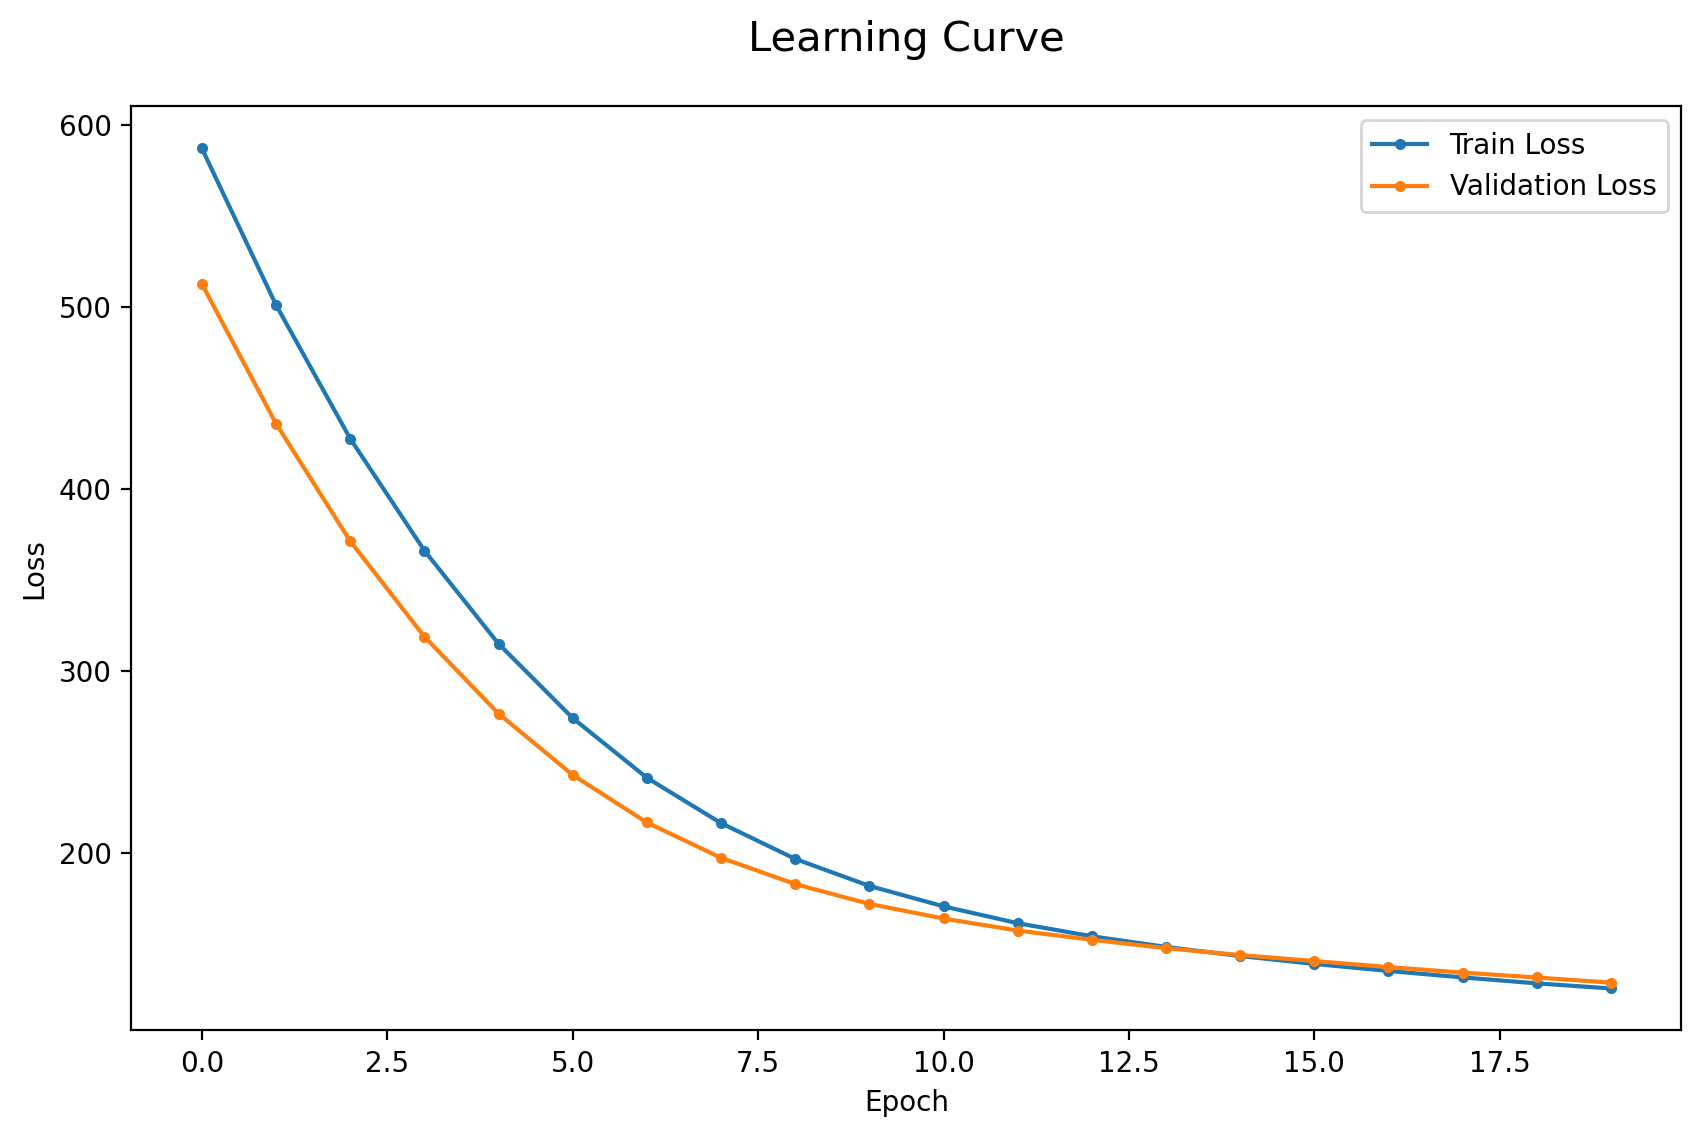

In [13]:
# 학습 곡선
dl_history_plot(hist)

### (3) 예측 및 평가

In [14]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE:', mean_absolute_error(y_val, y_pred))
print('* R2 Score:', r2_score(y_val, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
* MAE: 8.460290327259138
* R2 Score: -0.4466271219722906


## **4. 모델링 2: 전체 Feature**

- 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

#### 1) 데이터 분할

In [15]:
# x, y 분리
target = 'medv'
x = data.drop(columns=target)
y = data.loc[:, target]

# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

#### 2) 스케일링

In [18]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

#### 1) 모델 선언

In [19]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(1)
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [22]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse' )

In [23]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0).history

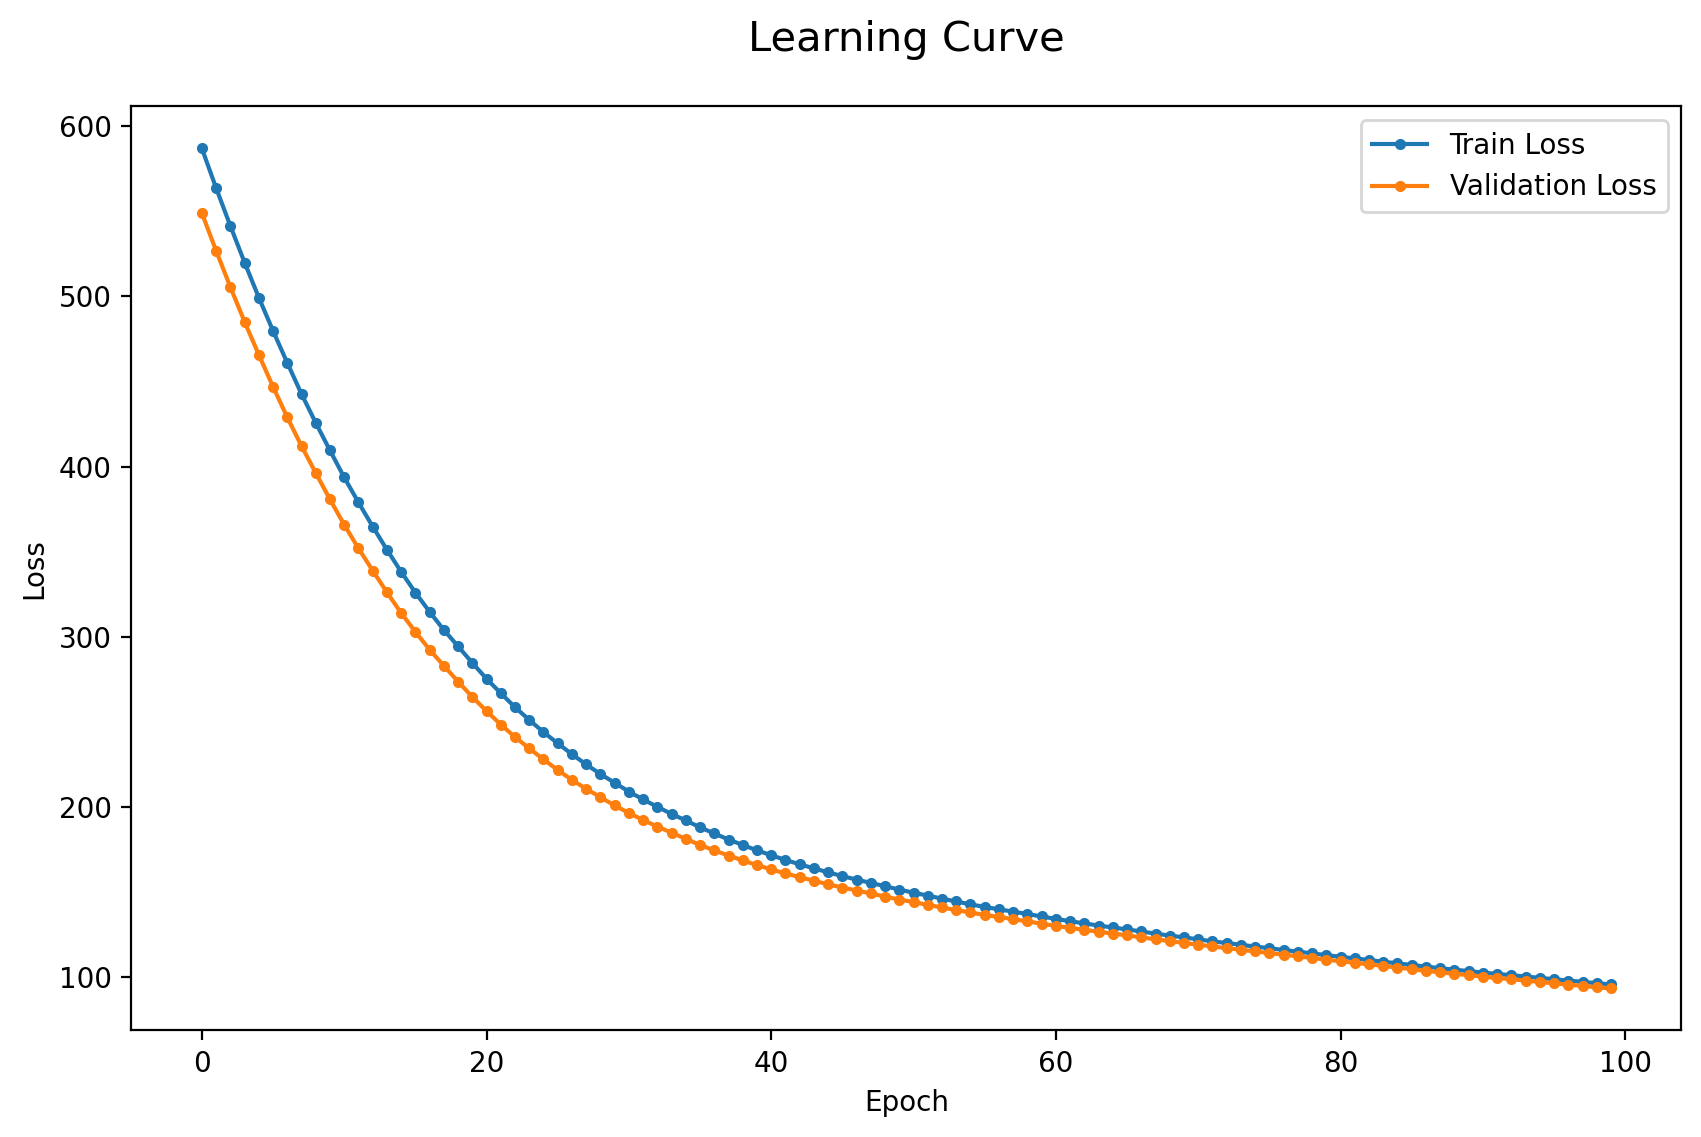

In [24]:
# 학습 곡선
dl_history_plot(hist)

#### 3) 예측 및 평가

In [25]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE :', mean_absolute_error(y_val, y_pred))
print('* R2 Score:', r2_score(y_val, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
* MAE : 7.547228255926393
* R2 Score: -0.09630286605222205


## **5. 모델링 3: Hidden Layer**

- 이제 레이어를 추가해 봅니다.

### (1) 데이터 전처리

#### 1) 데이터 분할

In [56]:
# x, y 분리
target = 'medv'
x = data.drop(columns=target)
y = data.loc[:, target]

# 학습용, 검증용 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

#### 2) 스케일링

In [57]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

#### 1) 모델 선언

In [58]:
# 메모리 정리
clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures,)),
    Dense(32, activation='relu'),
    Dense(1)
])


# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [59]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse' )

In [60]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0).history

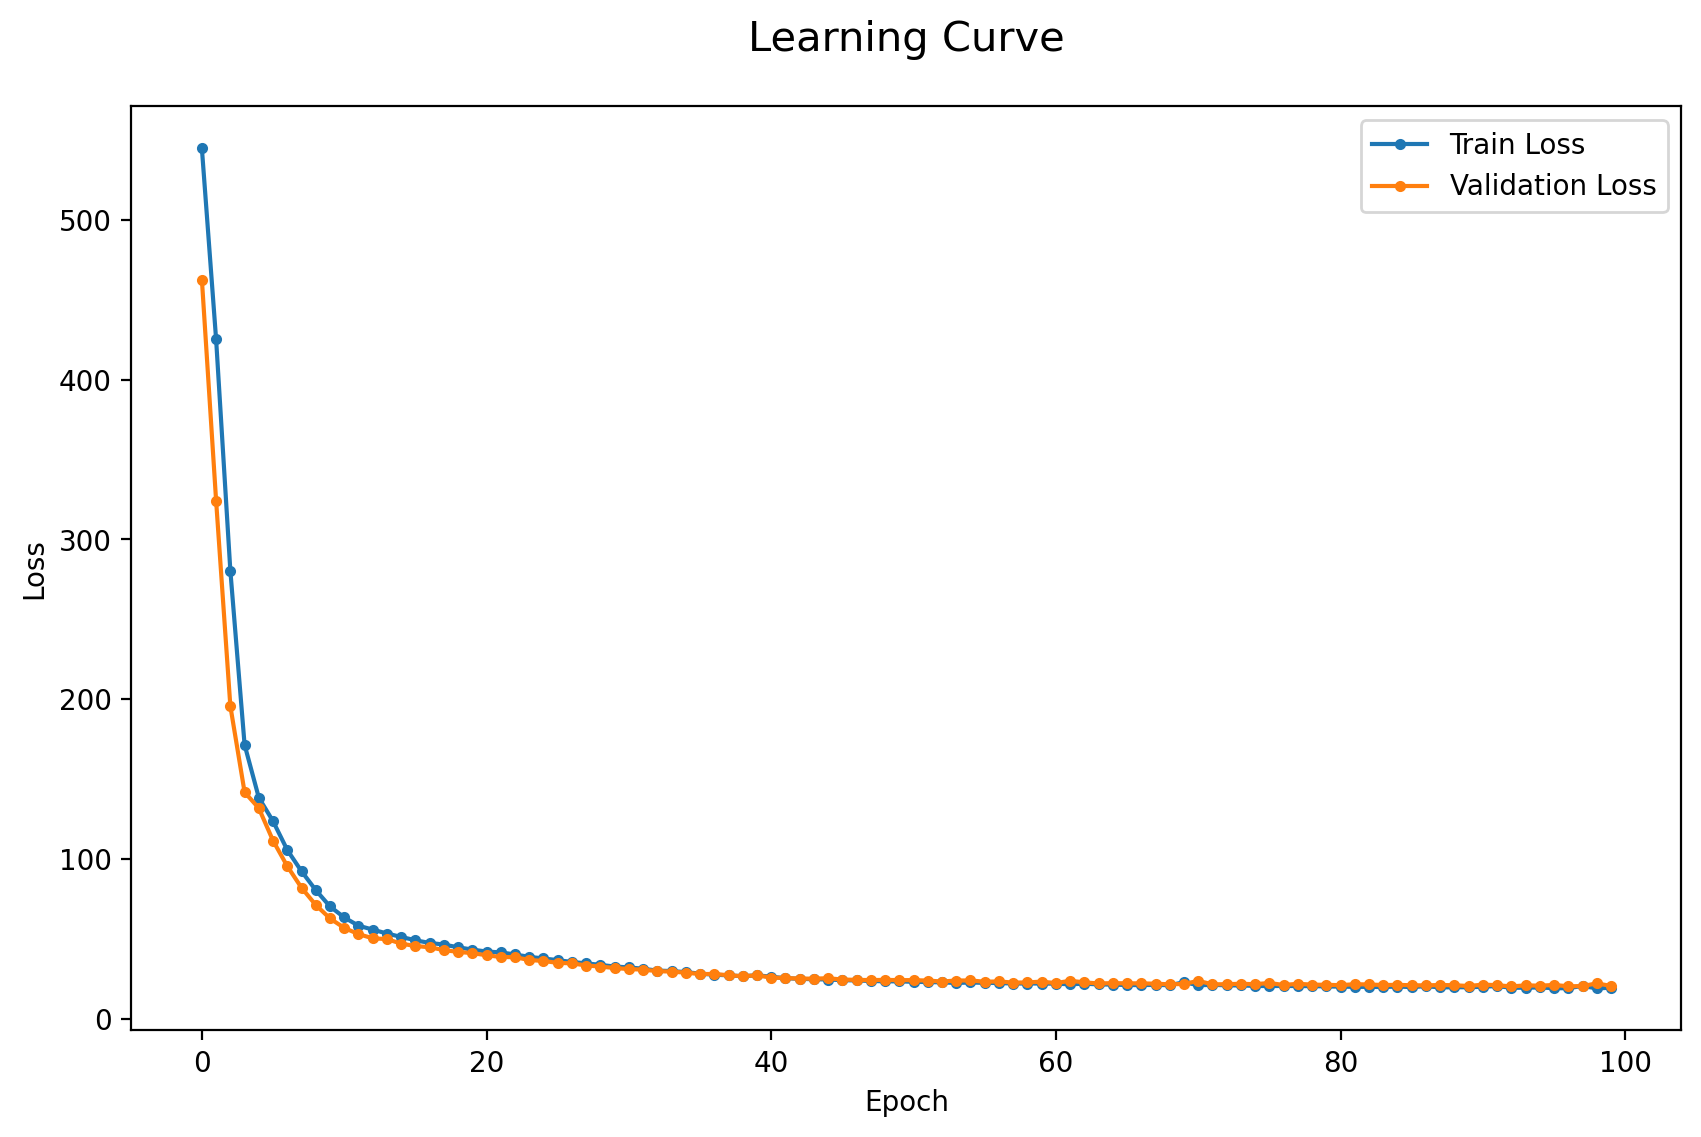

In [61]:
# 학습 곡선
dl_history_plot(hist)

#### 3) 예측 및 평가

In [62]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE:', mean_absolute_error(y_val, y_pred))
print('* R2 Score:', r2_score(y_val, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
* MAE: 3.0603025436401374
* R2 Score: 0.8402303170103435


## **6. 모델링 4: 실습**

- 다음 Summary를 보고 모델을 설계하세요.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

#### 1) 모델 선언

In [63]:
# 메모리 정리
tensorflow.keras.backend.clear_session()

# 입력 Feature 수
nfeatures = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeatures, )),
    Dense(32, activation='relu'),
    Dense(1)
])

# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [64]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse' )

In [65]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0).history

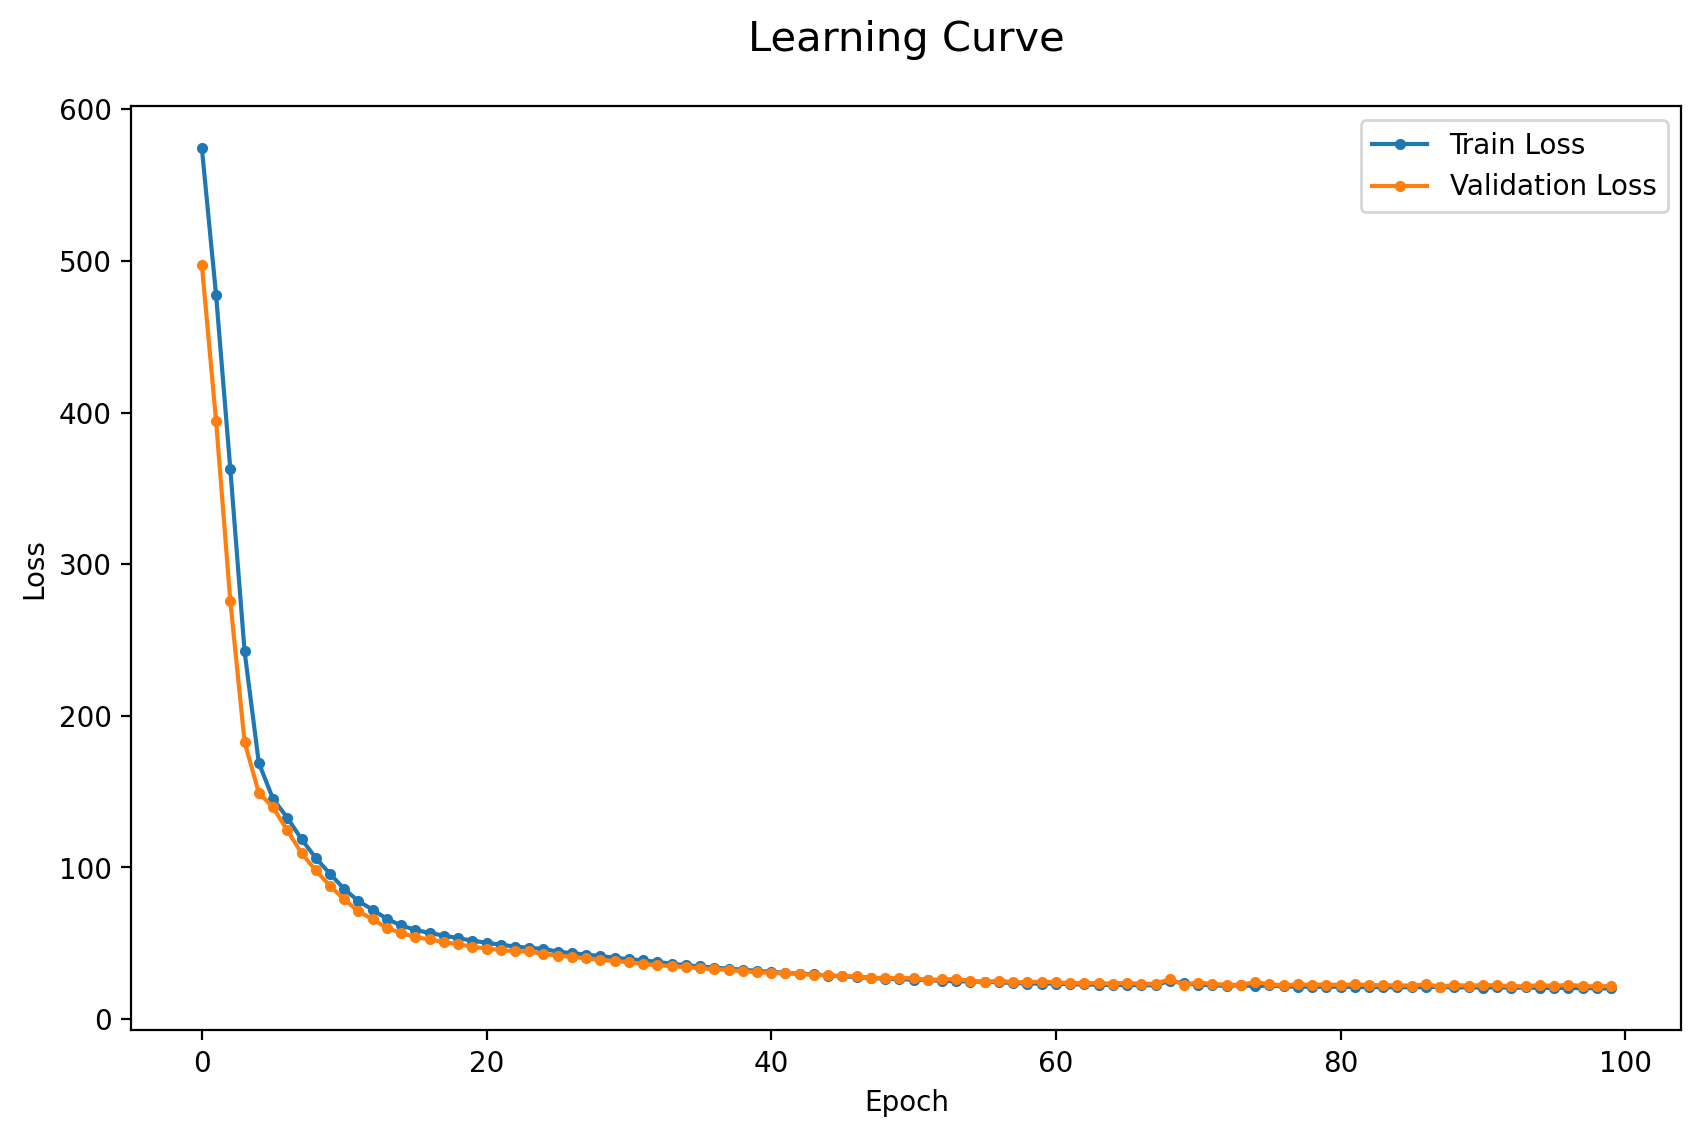

In [66]:
# 학습 곡선
dl_history_plot(hist)

#### 3) 예측 및 성능 평가

In [67]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE:', mean_absolute_error(y_val, y_pred))
print('* R2 Score:', r2_score(y_val, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
* MAE: 3.301493687723198
* R2 Score: 0.814562345689429


## **7. 모델링 5: 실습**

- 다음의 Summary를 보고 모델을 설계하세요.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

#### 1) 모델 선언

In [68]:
# 메모리 정리
tensorflow.keras.backend.clear_session

# 입력 Feature 수
nfeature = x.shape[1]

# Sequential 모델 선언
model = Sequential([
    Input(shape=(nfeature,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# 모델 요약
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [69]:
# 학습 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse' )

In [70]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0).history

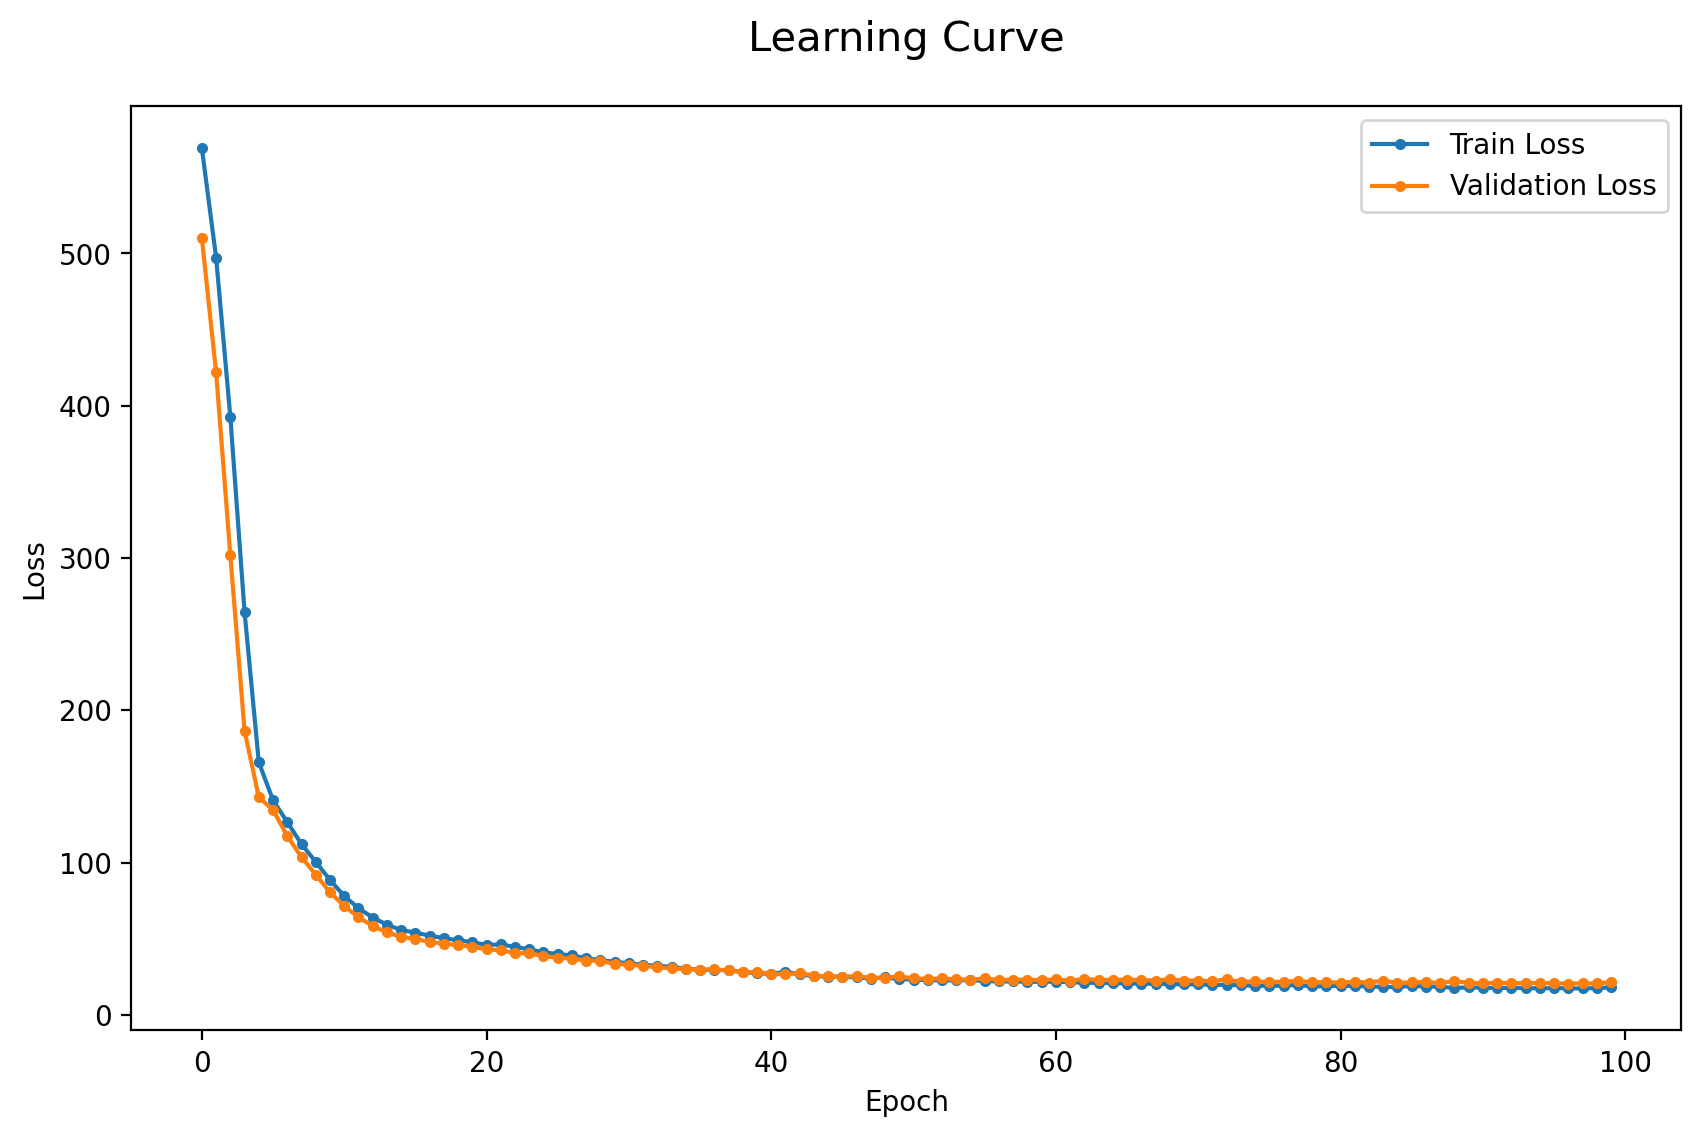

In [71]:
# 학습 곡선
dl_history_plot(hist)

#### 3) 예측 및 성능 평가

In [72]:
# 예측
y_pred = model.predict(x_val)

# 성능 평가
print('* MAE:', mean_absolute_error(y_val, y_pred))
print('* R2 Score:', r2_score(y_val, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
* MAE: 2.7964953357098157
* R2 Score: 0.8431646820402114
